# Import Libraries

In [8]:
from PIL import Image, ImageOps
import numpy as np
import os 
import matplotlib.pyplot as plt

# Display Images

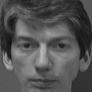

In [2]:
img=Image.open('face1.jpg')
img

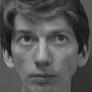

In [102]:
img=Image.open('face2.jpg')
img

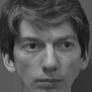

In [103]:
img=Image.open('face3.jpg')
img

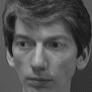

In [104]:
img=Image.open('face4.jpg')
img

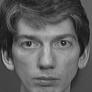

In [105]:
img=Image.open('face5.jpg')
img

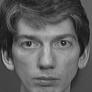

In [106]:
img=Image.open('face5.jpg')
img

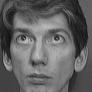

In [107]:
img=Image.open('face6.jpg')
img

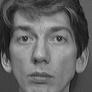

In [108]:
img=Image.open('face7.jpg')
img

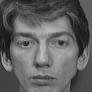

In [109]:
img=Image.open('face8.jpg')
img

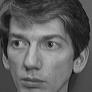

In [110]:
img=Image.open('face9.jpg')
img

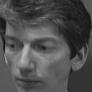

In [111]:
img=Image.open('face10.jpg')
img

In [112]:
print('Installed Pillow Version:', PIL.__version__)

Installed Pillow Version: 8.0.1


# Loading image as numpy array

In [5]:
img=Image.open('face1.jpg')
img_array=np.array(img)
img_array.shape

(92, 92, 3)

# steps:
1. Convert image into 1D array
2. Create a list if all arrays
3. Do the same for eigen bases

In [7]:
file_loc = 'C:\\Users\\DELL\\'
loc1 = os.path.join(file_loc,'imgs')
list1 = []
for filenames in os.listdir(loc1):
    #print(loc1+"\\"+filenames)
    img = Image.open(loc1+"\\"+filenames)
    grey_image=ImageOps.grayscale(img)  #converting images to grey scale
    img_array=np.array(grey_image)
    img_array_flat=img_array.flatten()   #flatten function used to convert 2D array to 1D
    list1.append(img_array_flat)

In [126]:
pwd       #present working directory  #the directory where the images folder is present should be same as the pwd 

'C:\\Users\\DELL'

In [116]:
np.shape(list1)       

(10, 8464)

In [9]:
xtx=np.dot(np.array(list1).T, np.array(list1))           #x transpose x 

In [10]:
xtx       

array([[  2, 243, 145, ...,  59, 167,  21],
       [243, 177, 111, ...,  76, 168, 236],
       [145, 111, 138, ..., 175, 236,  14],
       ...,
       [ 59,  76, 175, ..., 110, 182, 201],
       [167, 168, 236, ..., 182,   3,  27],
       [ 21, 236,  14, ..., 201,  27,  62]], dtype=uint8)

In [11]:
xtx.shape

(8464, 8464)

In [12]:
xxt=np.dot(np.array(list1), np.array(list1).T)

In [13]:
xxt.shape

(10, 10)

# Functions

In [35]:
def reconstruct_svd_img(img_array, k):
    """
    this is the function for  reconstructing images using singular value decomposition.
    paramters:
     img_array= image array (92X92)
     k= top k singular values
    """
    U,s,V = np.linalg.svd(img_array) 
    S = np.zeros(np.shape(img_array))
    for i in range(0, k):
        """
        taking only top k dimensions in the diagonal of matrix, making all other values of matrix as 0.so, the image we will get
        will have only major(top) k dimensions hence reducing its dimensions and memory usage
        """
        S[i,i] = s[i]
    recon_img = U @ S @ V
    return recon_img

def plot(img, recon_img,k):
    """
    this function is for making plot of the original and the reconstructed image
    parameters:
    recon_img=reconstructed image
    k= top k singular values
    """
    fig, ax = plt.subplots(1, 2)

    ax[0].imshow(img,cmap='gray')
    ax[0].axis('off')
    ax[0].set_title('Original')

    ax[1].imshow(recon_img,cmap='gray')
    ax[1].axis('off')
    ax[1].set_title(f'Reconstructed n = {k}')

    plt.show()

# Run SVD for all images

In [26]:
file_loc = 'C:\\Users\\DELL\\'
loc1 = os.path.join(file_loc,'imgs')
def topk(loc1, k):
    """
    this function is to take top k value and returning the plot of original and reconstructed image.
    parameters:
    loc1=location of the file
    k=top k singular values
    """
    for filenames in os.listdir(loc1):
        img = Image.open(loc1+"\\"+filenames)
        grey_image=ImageOps.grayscale(img)  #converting images to grey scale
        img_array=np.array(grey_image)
        recon_img = reconstruct_svd_img(img_array, k)
        plot(img, recon_img,k)

## Using top 10 singular value

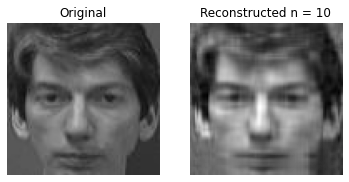

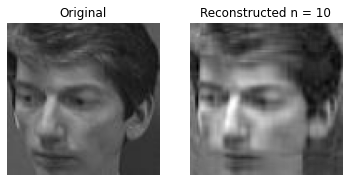

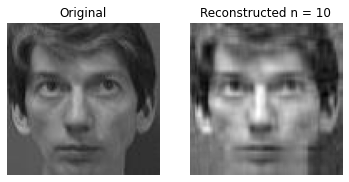

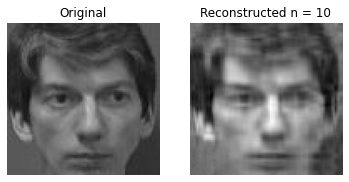

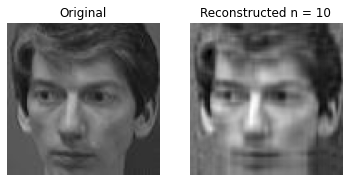

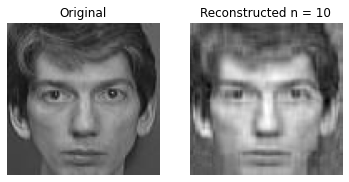

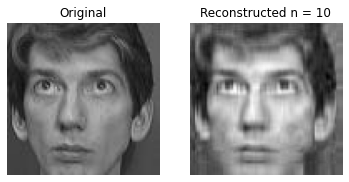

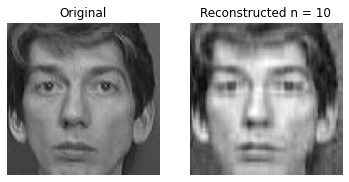

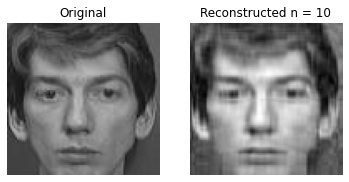

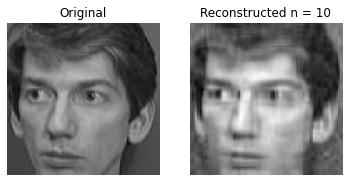

In [27]:
k=10
topk(loc1, k)

## Using top 20 singular value

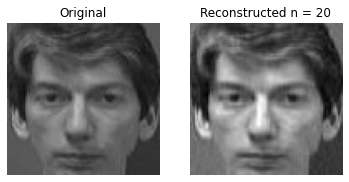

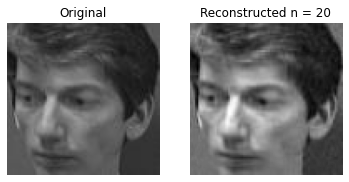

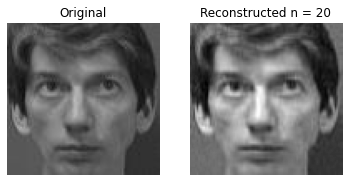

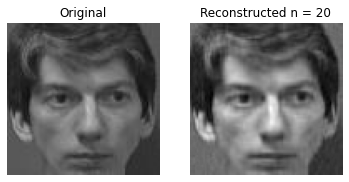

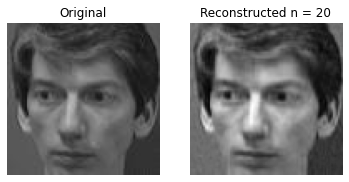

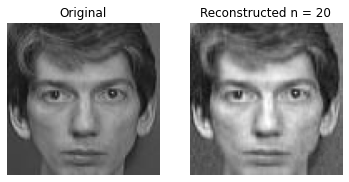

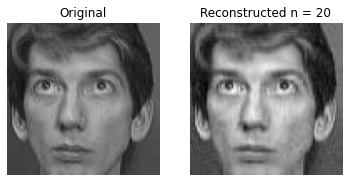

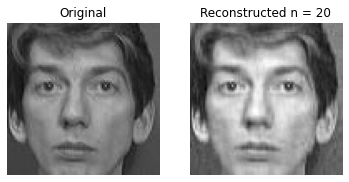

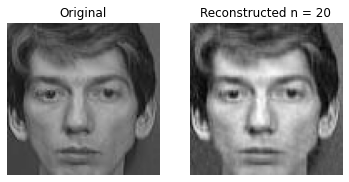

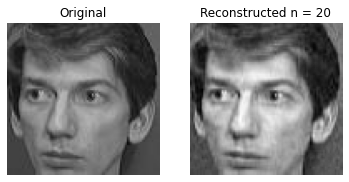

In [28]:
k=20
topk(loc1, k)

## Using top 50 singular values

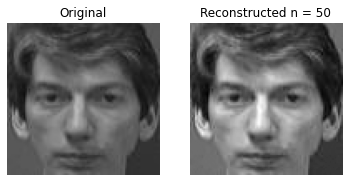

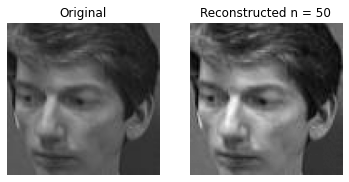

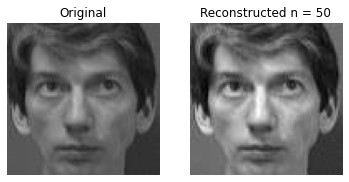

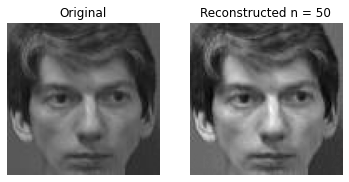

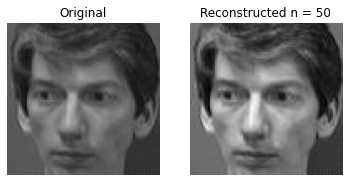

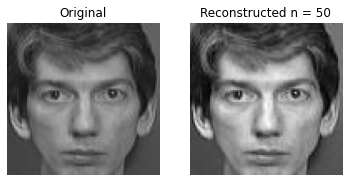

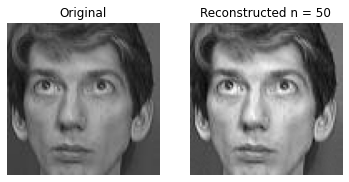

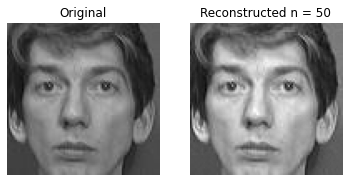

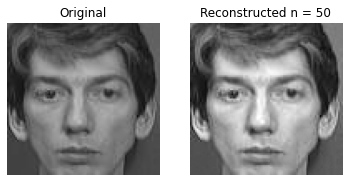

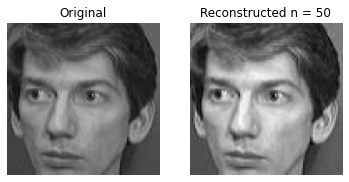

In [29]:
k=50
topk(loc1, k)

# Conclusion

As we increase the k values, the quality of the image increases. This is because now the reconstrusted image uses more dimensions to reconstruct. Our purpose was to decrease the dimensions so that less memory is required in storing the image.
The lesser the k values we will use, the lesser the storage it will require. Hence, this reconstructed image will have only significant difference from original image with lesser dimensions, lesser storage usage and lesser time taking to send the image.